In [19]:
import numpy as np
import pandas as pd

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data

In [21]:
Transaction = pd.read_csv('data/E-Commerce.csv', encoding = "ISO-8859-1")

# Examining Data

In [22]:
Transaction.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [14]:
Transaction.shape

(541909, 8)

In [23]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Set Date from String Format to DateTime Format

In [24]:
Transaction['InvoiceDate'] = pd.to_datetime(Transaction['InvoiceDate'])

In [25]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [26]:
Transaction['InvoiceDate'] = Transaction['InvoiceDate'] .sort_values()

In [27]:
Transaction.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Creating a New Colums for Sales 

In [28]:
Transaction['Sales'] = Transaction['Quantity'] * Transaction['UnitPrice']

In [29]:
Transaction.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Boolean Indexing for Selection

In [30]:
Transaction = Transaction[(Transaction['Sales'] < 5000) & (Transaction['Sales'] > 0)]

In [31]:
Transaction.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [34]:
Transaction = Transaction.set_index('InvoiceDate')

In [35]:
Sales_per_Month = Transaction['Sales'].resample('M').sum()

In [36]:
Sales_per_Month

InvoiceDate
2010-12-31     810204.810
2011-01-31     607641.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     531269.221
2011-05-31     762393.270
2011-06-30     722769.900
2011-07-31     719221.191
2011-08-31     748076.320
2011-09-30    1051445.452
2011-10-31    1154979.300
2011-11-30    1509496.330
2011-12-31     470323.080
Freq: M, Name: Sales, dtype: float64

# Ploting

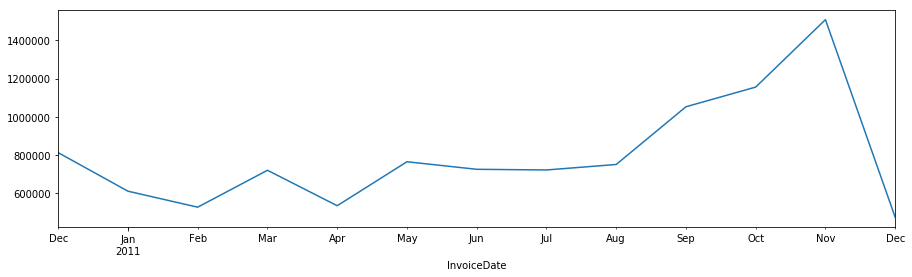

In [37]:
Sales_per_Month.plot(kind='line', figsize=(15, 4))

In [39]:
Sales_per_Month = Sales_per_Month['2010-12-31': '2011-11-30']

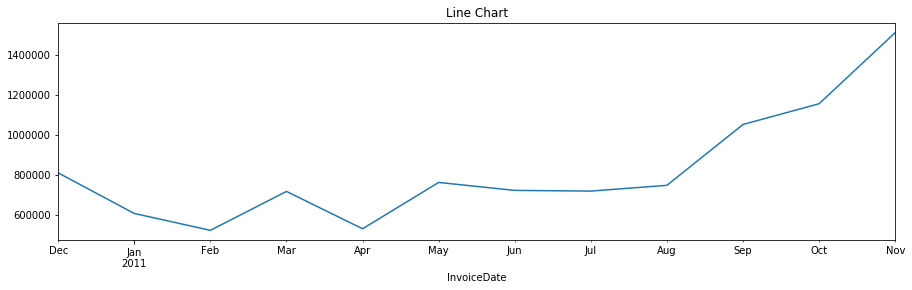

In [40]:
Sales_per_Month.plot(kind='line', figsize=(15, 4), title='Line Chart')

Text(0, 0.5, 'Total Sales per Month')

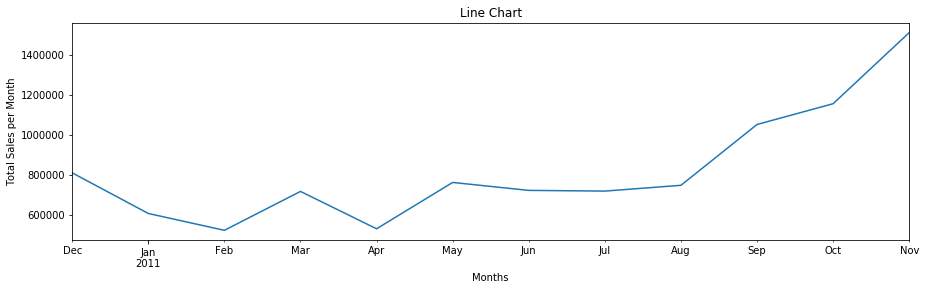

In [42]:
ax = Sales_per_Month.plot(figsize=(15, 4))

ax.set_title('Line Chart')
ax.set_xlabel('Months')
ax.set_ylabel('Total Sales per Month')

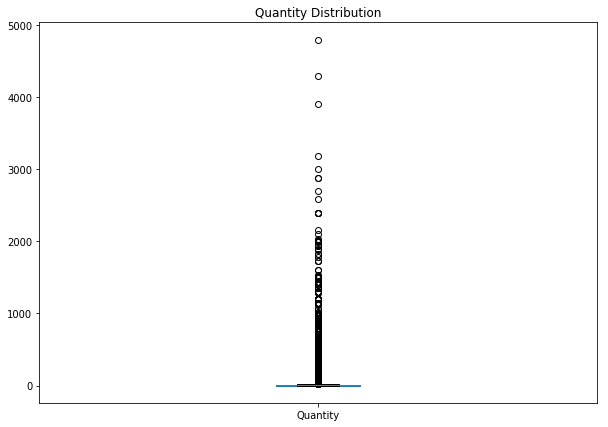

In [43]:
Transaction['Quantity'].plot(kind='box', figsize=(10, 7), title='Quantity Distribution')

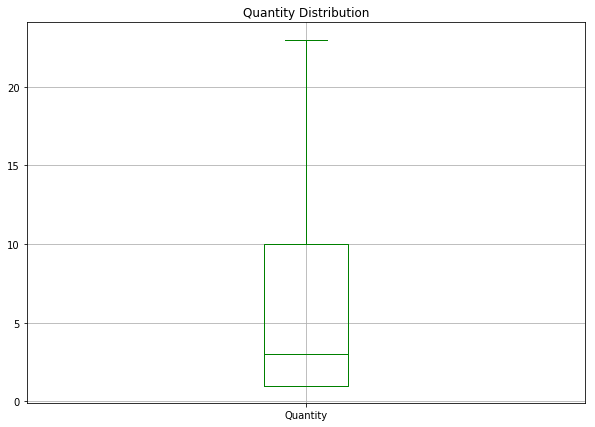

In [44]:
Transaction['Quantity'].plot(kind='box', figsize=(10, 7), title='Quantity Distribution', showfliers=False, grid=True, color='green')

In [46]:
Transaction['Description'].nunique()

4024

In [47]:
Transaction = Transaction.reset_index()

In [48]:
Transaction.head()

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Sales
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
3,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
4,2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34


In [50]:
DVC = Transaction['Description'].value_counts()

In [51]:
DVC

WHITE HANGING HEART T-LIGHT HOLDER     2323
JUMBO BAG RED RETROSPOT                2112
REGENCY CAKESTAND 3 TIER               2017
PARTY BUNTING                          1706
LUNCH BAG RED RETROSPOT                1594
ASSORTED COLOUR BIRD ORNAMENT          1489
SET OF 3 CAKE TINS PANTRY DESIGN       1399
PACK OF 72 RETROSPOT CAKE CASES        1370
LUNCH BAG  BLACK SKULL.                1328
NATURAL SLATE HEART CHALKBOARD         1263
JUMBO BAG PINK POLKADOT                1238
HEART OF WICKER SMALL                  1226
PAPER CHAIN KIT 50'S CHRISTMAS         1200
JUMBO STORAGE BAG SUKI                 1197
JUMBO SHOPPER VINTAGE RED PAISLEY      1190
LUNCH BAG SPACEBOY DESIGN              1179
LUNCH BAG CARS BLUE                    1174
JAM MAKING SET PRINTED                 1169
SPOTTY BUNTING                         1158
JAM MAKING SET WITH JARS               1141
RECIPE BOX PANTRY YELLOW DESIGN        1126
POSTAGE                                1125
LUNCH BAG SUKI DESIGN           

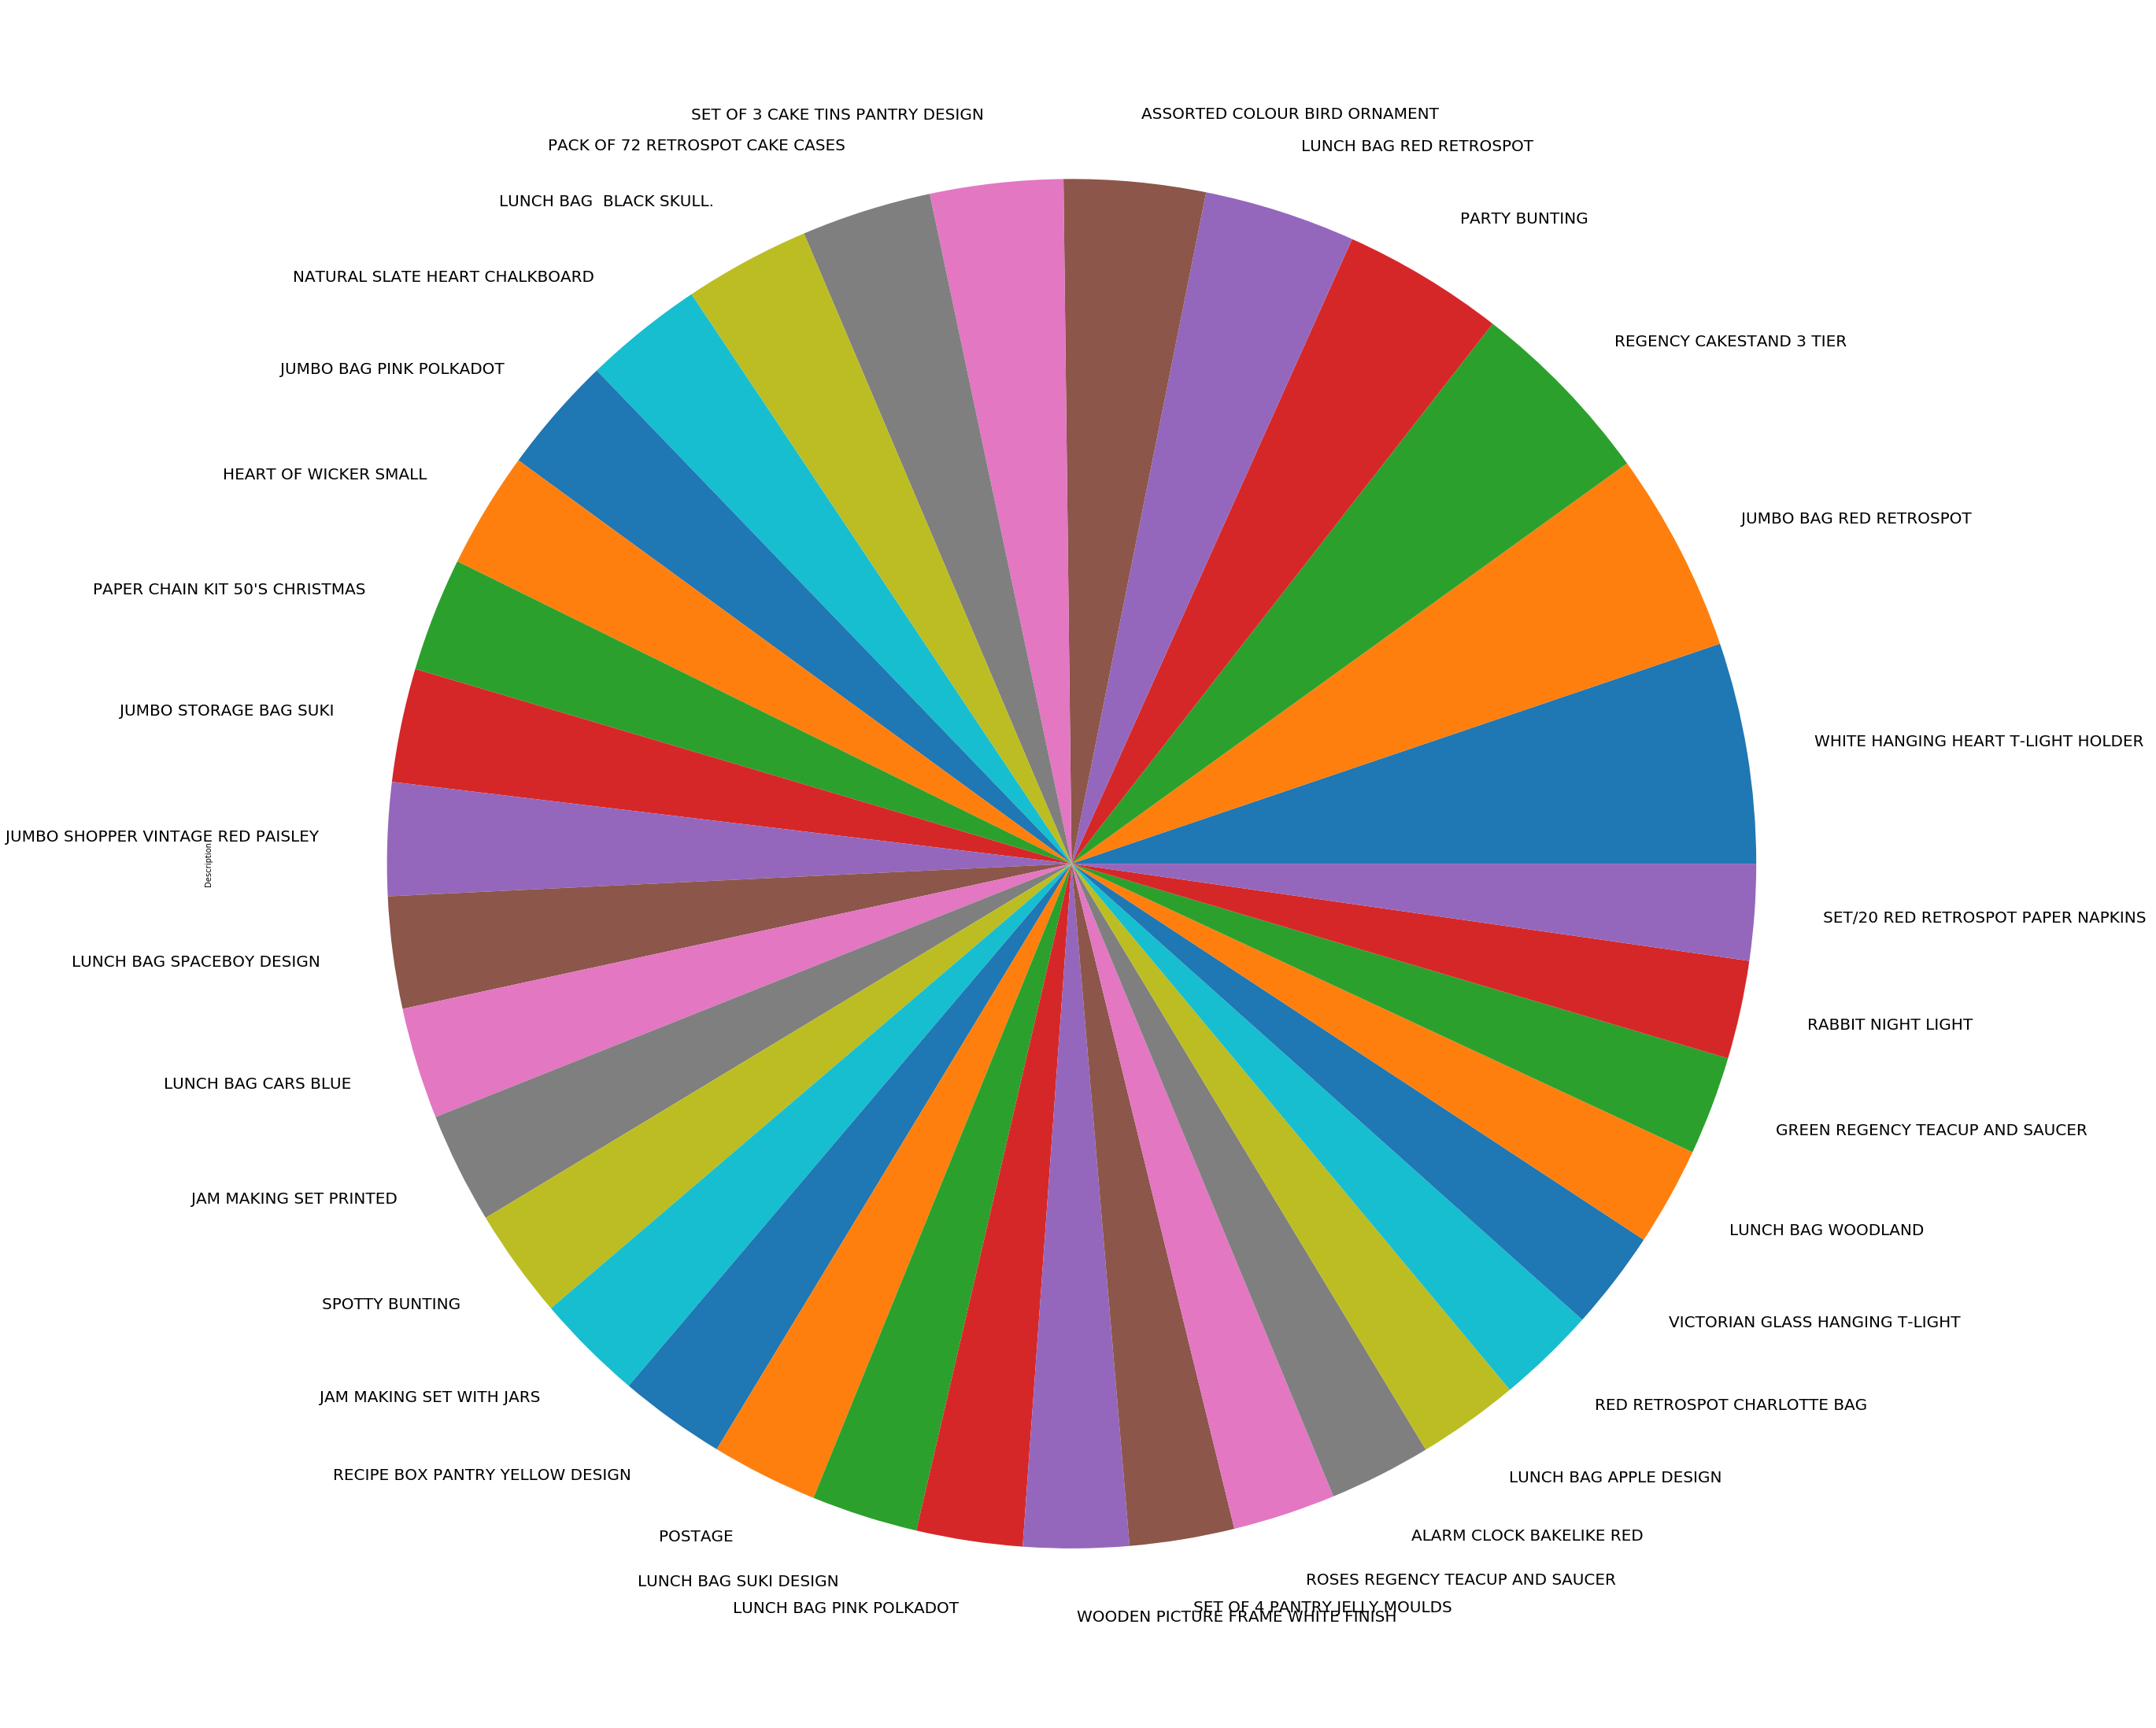

In [53]:
DVC[DVC > 1000].plot(kind='pie', figsize=(40, 40), fontsize=20)

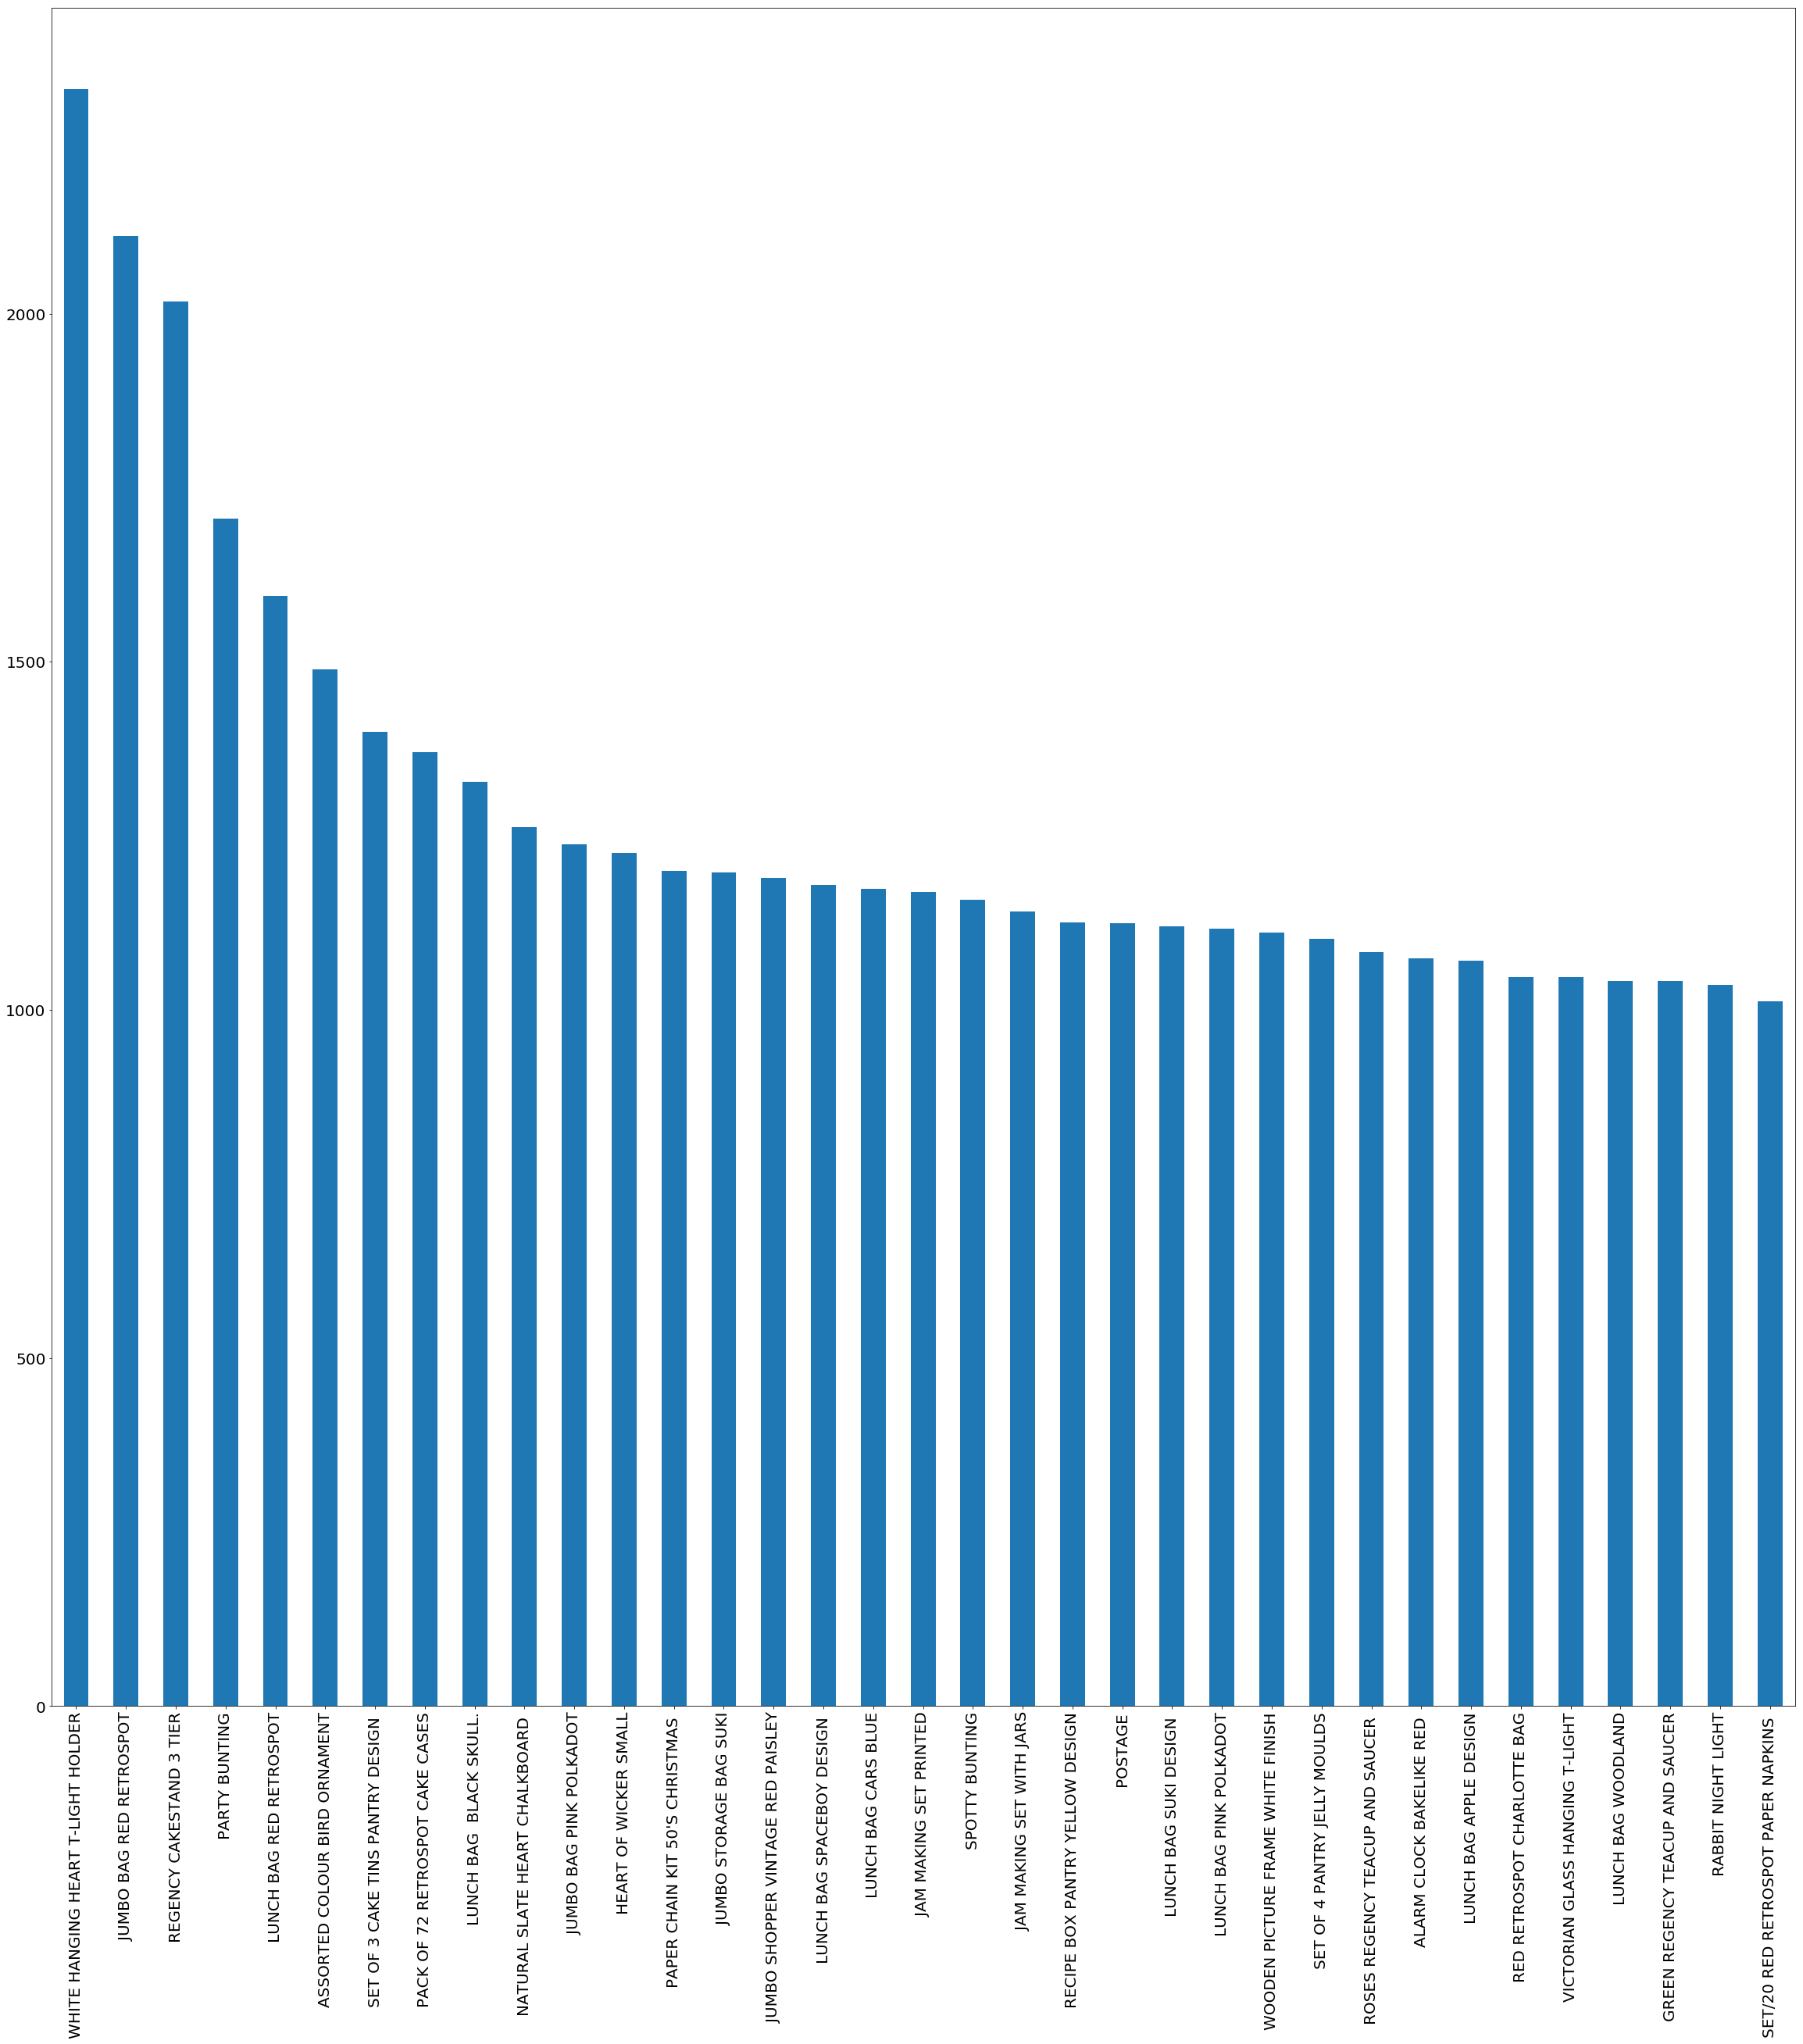

In [55]:
DVC[DVC > 1000].plot(kind='bar', figsize=(40, 40), fontsize=20)

In [56]:
TV = Transaction['Quantity'].value_counts()

In [57]:
TV.head()

1     147820
2      81699
12     61044
6      40839
4      38442
Name: Quantity, dtype: int64

In [60]:
TQ50 = TV[TV.index < 50] 

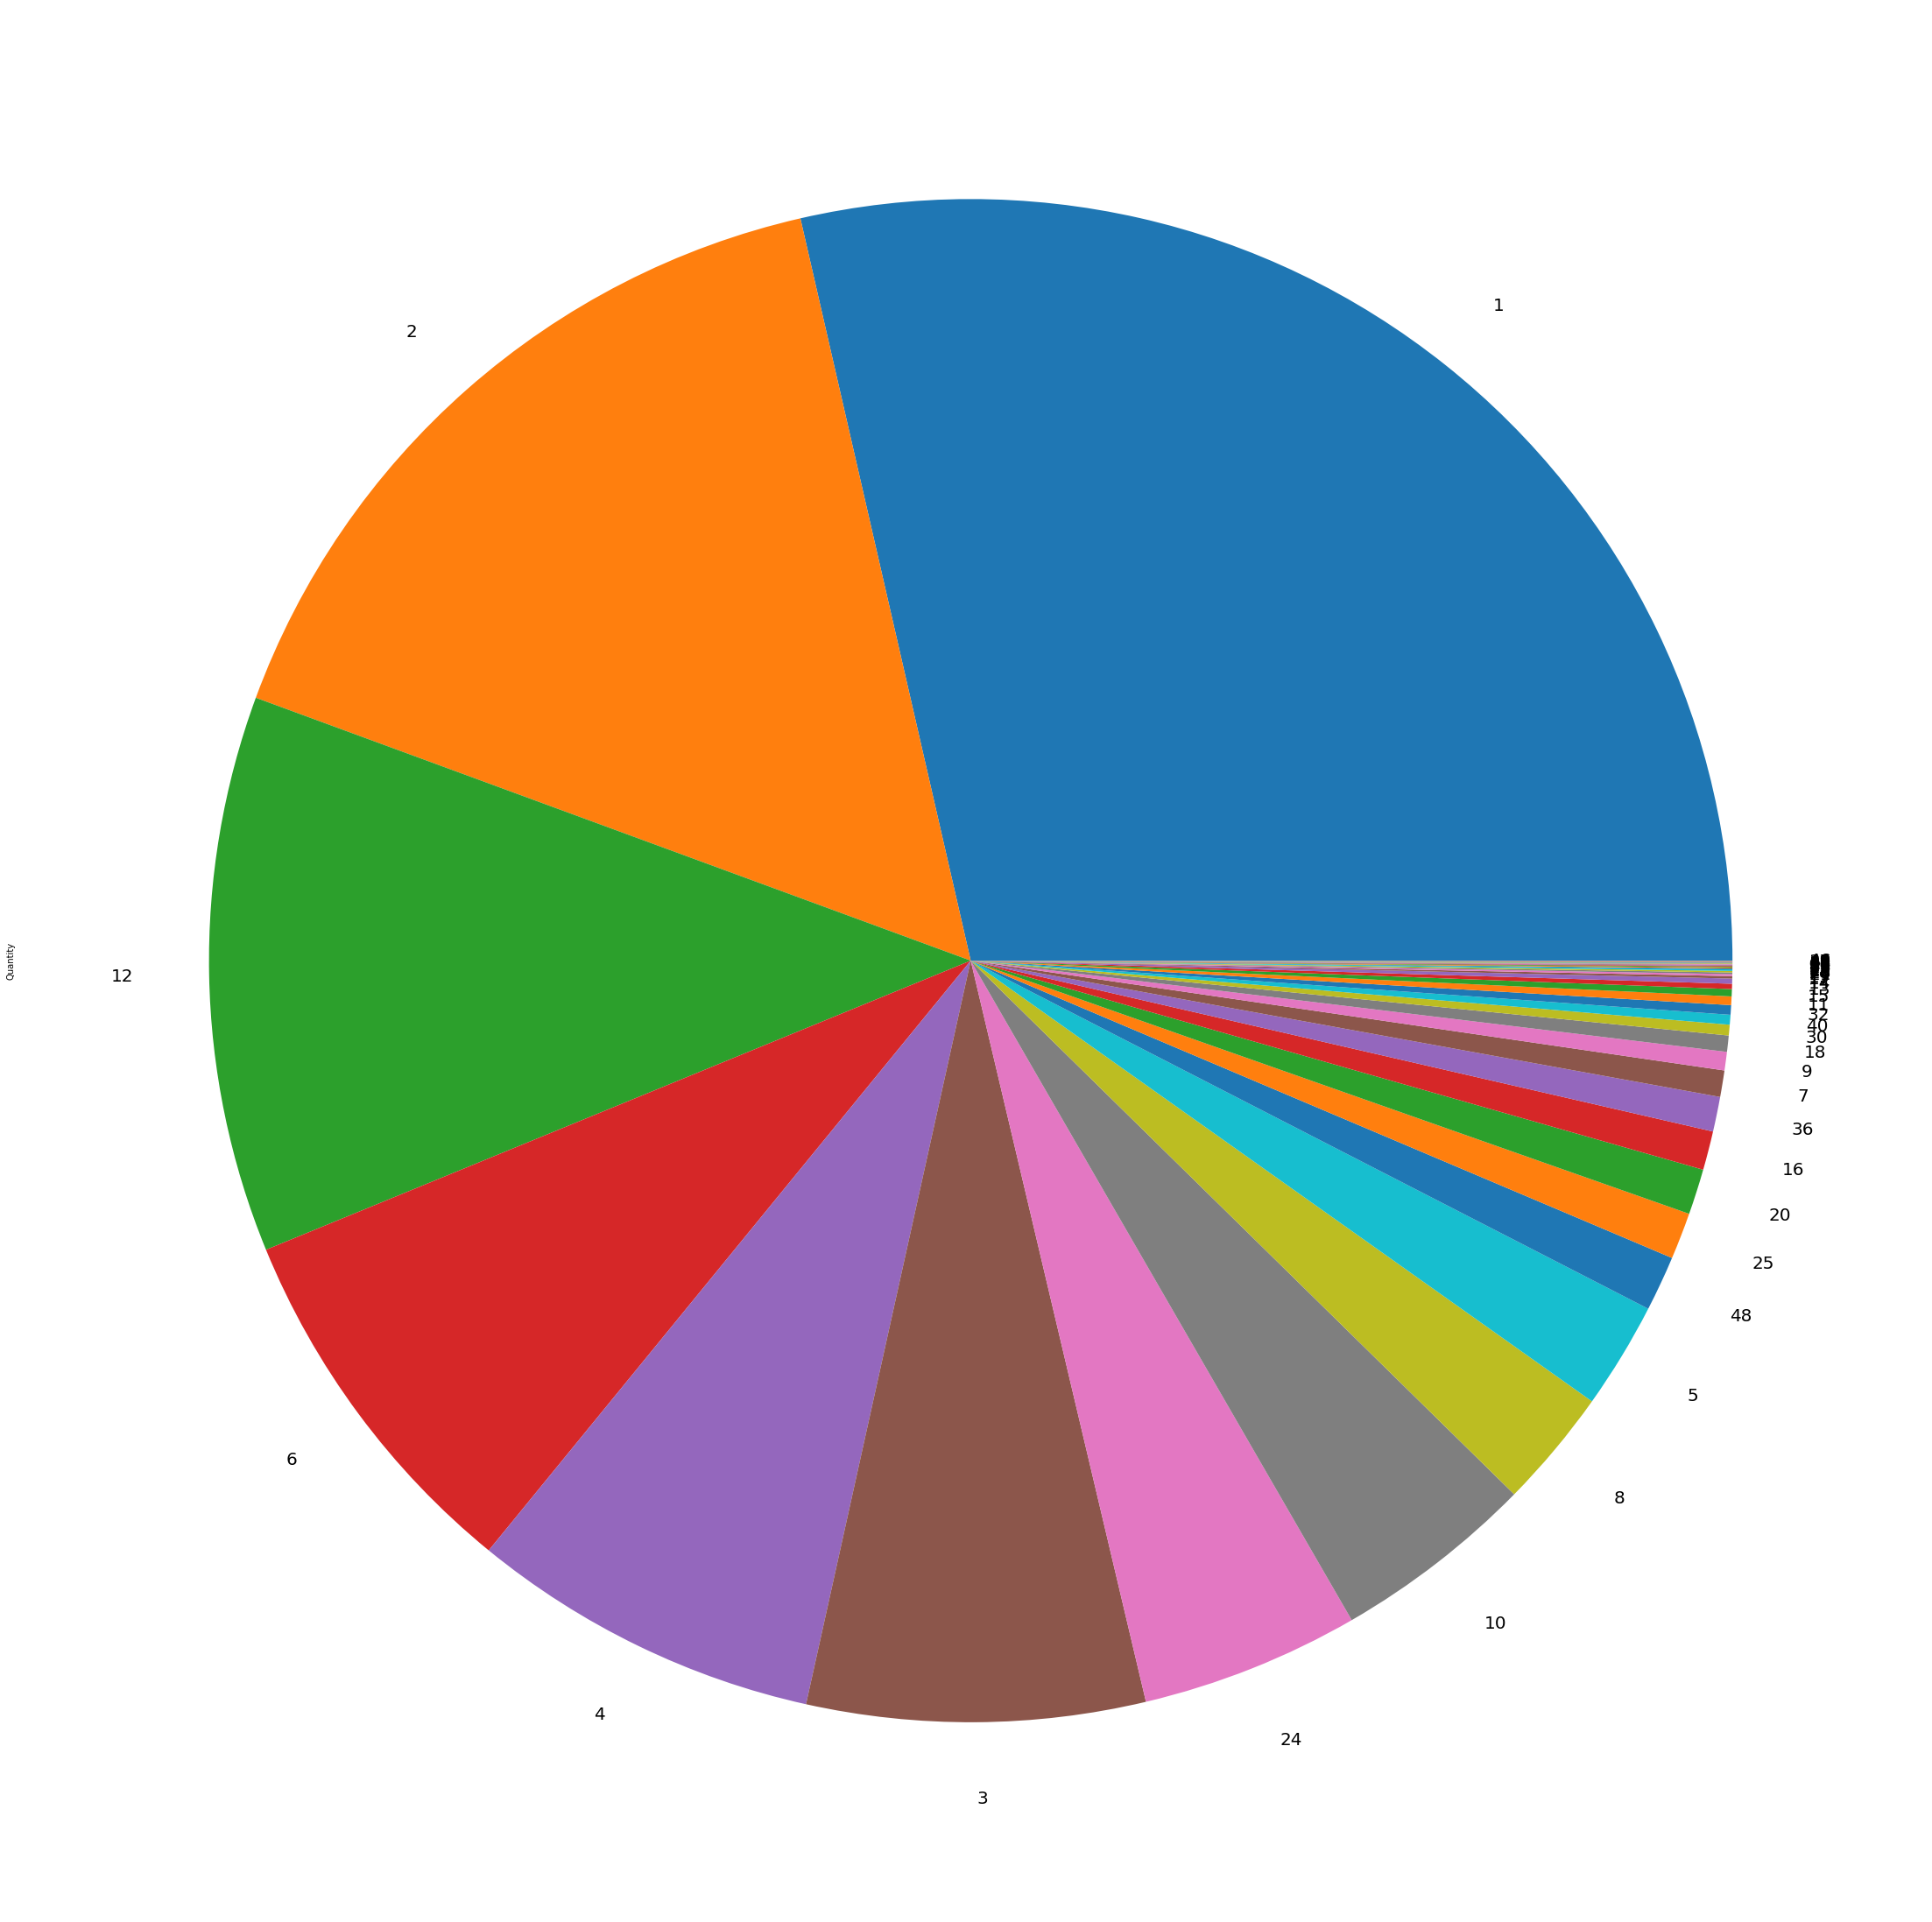

In [61]:
TQ50.plot(kind='pie', figsize=(40, 40), fontsize=20)

In [62]:
TQ25 = Transaction[Transaction['Quantity'] < 25]

In [64]:
TQ25.head()

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Sales
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
3,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
4,2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34


In [68]:
TQ25VC = TQ25['Quantity'].value_counts()

In [69]:
TQ25VC.head()

1     147820
2      81699
12     61044
6      40839
4      38442
Name: Quantity, dtype: int64

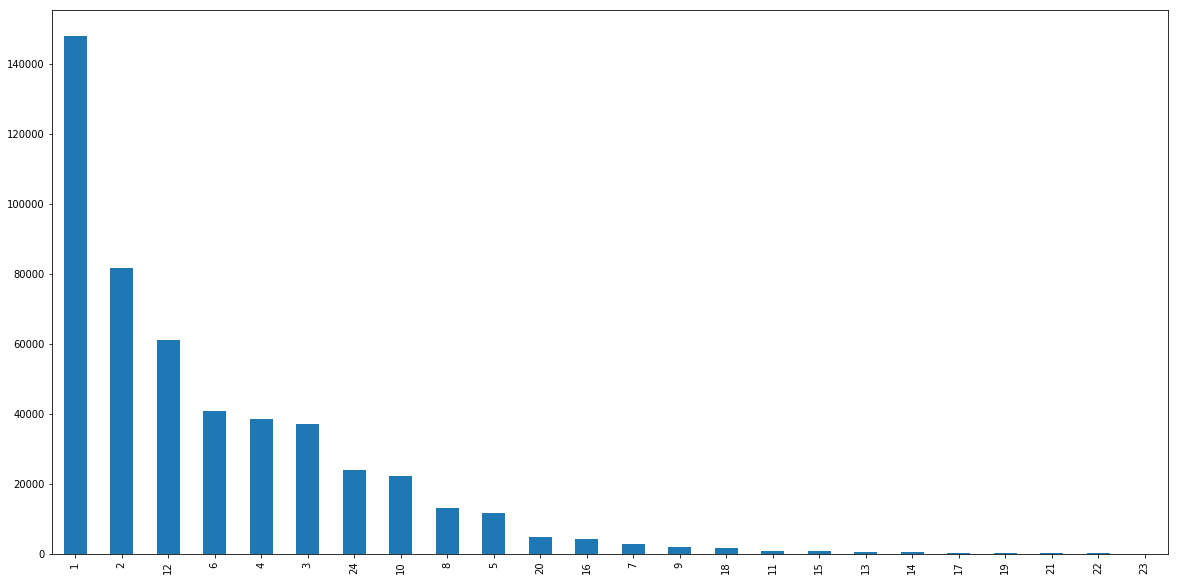

In [70]:
TQ25VC.plot(kind='bar', figsize=(20, 10))